<a href="https://colab.research.google.com/github/GabrielHiss/ANALISE-DE-DADOS-PARA-VENDAS-DE-UMA-GRANDE-EMPRESA-DE-VAREJO-COM-A-METODOLOGIA-CRISP-DM/blob/main/DNC_Gabriel_Hiss_Dias_61873_Mini_projeto_ANALISE_DE_DADOS_PARA_VENDAS_DE_UMA_GRANDE_EMPRESA_DE_VAREJO_COM_A_METODOLOGIA_CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS PARA VENDAS DE UMA GRANDE EMPRESA DE VAREJO COM A METODOLOGIA CRISP-DM

DNC - Gabriel Hiss Dias - 61873

Link do Colab: https://colab.research.google.com/drive/1XiYf3HjO3l3FXzDVCARwT2ak4HaUswD8?usp=sharing

# 1 - A QUESTÃO DO NEGÓCIO (Business Understanding)

Walmart, Inc., é uma multinacional estadunidense de lojas de
departamento.
A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de
outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972.

No ano de 2021, obteve um um lucro de $13.51 Bilhões.

O mercado imobiliário dos Estados Unidos é conhecido como cheio de oportunidades por muitos, devido ser um país de alto poder aquisitivo, de e proporções continentais e com grandes oportunidades para o empreendedorismo.

No Brasil o consumo corresponde a 65% da composição do PIB, sendo que nos EUA esse valor pode chegar até 68%, isso implica em uma boa oportunidade para lucro, principalmente em eventos e datas comemorativas.

A empresa tem  forte interesse em fazer um levantamento do
faturamento das lojas nos USA e apontar qual loja seria melhor para
expandir seu tamanho.


1.1 - Qual a minha meta?

Resposta: A empresa quer fazer um levantamento do
faturamento das lojas nos USA e apontar qual loja seria melhor para
expandir seu tamanho.


1.2 - Como posso chegar?

Resposta: Através de gráficos, ferramentas e técnicas de visualização de dados.

# 2 - O ENTENDIMENTO DO NEGÓCIO

 2.1  - Quais dados eu tenho disponível?

 Resposta: Número da loja, temperatura do dia, data, número de vendas semanais, preço do combustível, taxa de desemprego...

 2.2 - Eles são relevantes para o problema?

Resposta: Sim, são dados ideais para este tipo de análise.

 2.3 - Eles me trazem uma solução direta?

Resposta: Não, são muitas variáveis e necessita de uma análise mais aprofundada. Não há dados diretos sobre comportamento de clientes como por exemplo número de visualizações de anúncios ou notas em sites, preços ou produtos.

 2.4 - Qual o meu setor ou range de negócio?

Resposta: Setor de Varejo dos EUA.


#3 - COLETANDO DADOS - Data Understanding

3.1 - IMPORTANDO BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from scipy import stats
from datetime import datetime

3.2 - IMPORTAÇÃO DO DATASET

In [ ]:
dados = pd.read_csv('Walmart.csv') 
dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


3.3 VERIFICANDO O DATASET

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
dados.shape

(6435, 8)

O Dataset apresenta a venda de imóveis e suas características na região 
e tem um total de 6435 registros com um total de 8 atributos. 



 3.4 - Os dados que eu tenho fazem sentido?

Resposta: De primeiro momento sim. Os formatos estão corretos precisamos verificar na Limpeza de dados se há algum outlier.

 3.5 - Estão no formato que eu gostaria?

Resposta: O único formato que talvez precise ser alterado seja a data da coluna "DATE", talvez seja necessário transformar o formato.

3.6 - O que mais eu consigo obter de informação destes dados?

Resposta: Será interessante fazer uma análise mais profunda, de primeiro momento os dados estão de acordo.

# 4 - LIMPEZA DE DADOS - Data Preparation

4.1 - CORRIGIR FORMATOS DE DADOS NECESSÁRIOS

In [ ]:
#VERIFICAR DATAS
dados['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [ ]:
dados['Date'] = pd.to_datetime(dados['Date']) #transformar tipo de dados de string para date
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
dados['Store'].unique() #esta dentro da classificação estabelecida

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em 45 lojas.

4.2 - VERIFICANDO DADOS DUPLICADOS

In [ ]:
duplicados= dados.duplicated()
duplicados = duplicados.sum()

print('A base de dados tem %s dados duplicados.' %(duplicados))

#se for 0 é um ótimo resultado e a base não precisa ser tratada

A base de dados tem 0 dados duplicados.


4.3 - VERIFICANDO OS NULOS

In [ ]:
nulos = dados.isnull()
nulos.sum()

#se a soma de todos for 0 é um ótimo resultado e a base não precisa ser tratada

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

4.4 - VERIFICANDO OUTILIERS E/OU CLASSIFICAÇÕES 

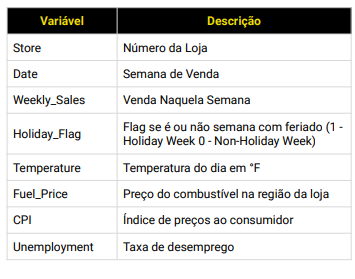

In [ ]:
dados['Holiday_Flag'].unique() #Verificar se dados estão dentro da classificação estabelecida

array([0, 1])

# 5 - EXPLORAÇÃO DE DADOS - Modeling

Para ínicio da exploração de dados vamos verificar algumas métricas descritivas para entender a distribuição dos dados.

In [ ]:
dados.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Pontos importantes observados:

- Temperatura mínima de -19°C e máxima de 38°C, ou seja, dentro das temperaturas padrões norte americanas.

- Desvio padrão de vendas semanais aparentemente alto, é um ponto de atenção para sazonalidades.

- Desvio padrão baixo para preço de combustível, pode indicar que o preço do combustível possívelmente não tenha tanta influência sobre vendas.

5.1 - Quais as minhas métricas essenciais?

Resposta: Para a análise deste problema iremos considerar como métricas essenciais: Número de vendas (Weekly_Sales), Feriados (Holiday_Flag), Taxa de desemprego (Uneployment) e datas (Date).

A escolha destas métricas como essenciais será devido um perfil de vendas, ou seja, demonstrar qual o comportamento de vendas para saber qual loja é mais atrativas e possui superioridade em vendas.

5.2 Visualização dos dados

Vamos entender a média de vendas (e outros atributos) por loja.

In [ ]:
#Média das variáveis de acordo com a lojas
media_vendas = dados.groupby(dados['Store']).agg('mean').reset_index()
media_vendas

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
1,2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
2,3,4.027044e+05,0.06993,71.434196,3.219699,219.391531,7.176986
3,4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
4,5,3.180118e+05,0.06993,69.410140,3.219699,216.565581,6.295406
5,6,1.564728e+06,0.06993,69.700000,3.219699,217.553197,6.606902
6,7,5.706173e+05,0.06993,39.720280,3.241559,193.664243,8.585734
7,8,9.087495e+05,0.06993,62.513986,3.219699,219.439026,6.091846
8,9,5.439806e+05,0.06993,67.775175,3.219699,219.626689,6.099881
9,10,1.899425e+06,0.06993,72.241189,3.575923,128.679669,8.362965


Vamos entender a distribuição de vendas semanais por loja, a média de vendas semanais por loja e vendas semanais por dia da semana e feriado.

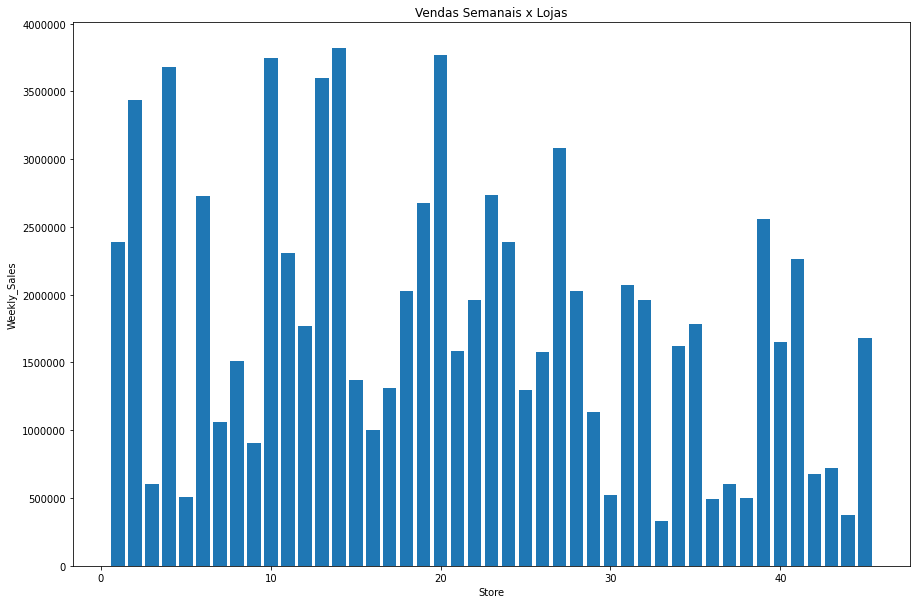

In [ ]:
#Vendas semanais por Lojas
plt.figure( figsize=(15,10))

plt.bar(dados.Store, dados.Weekly_Sales)

plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.title('Vendas Semanais x Lojas')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

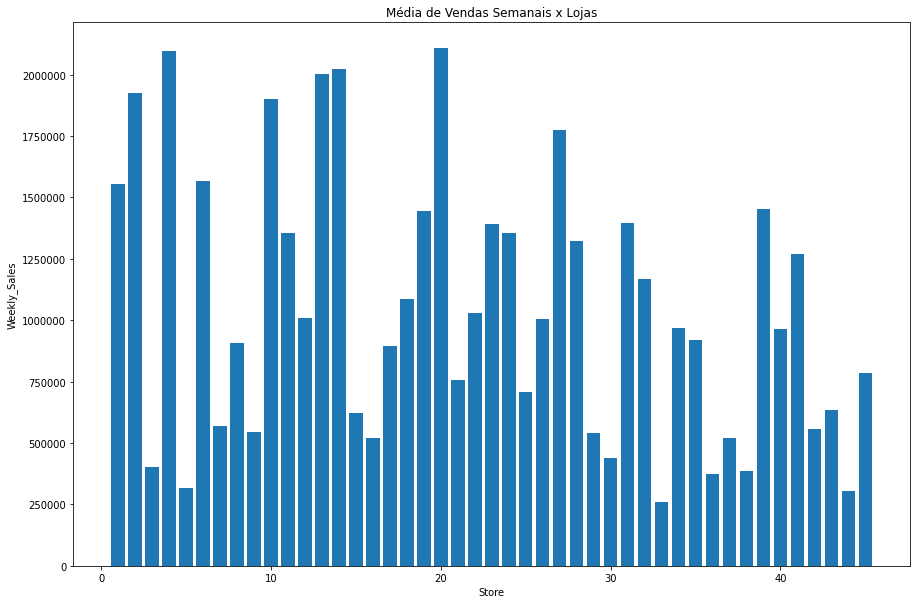

In [ ]:
#Média de vendas semanais por loja
plt.figure( figsize=(15,10))

plt.bar(media_vendas.Store, media_vendas.Weekly_Sales)

plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.title('Média de Vendas Semanais x Lojas')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

Observamos e que as médias de vendas é proporcional as vendas absolutas.

Podemos observar algumas lojas em destaque de primeiro momento como por exemplo as lojas 4, 10, 14, 20, 23....

Para análise comportamental do consumidor devemos analisar o número de vendas por feriado.

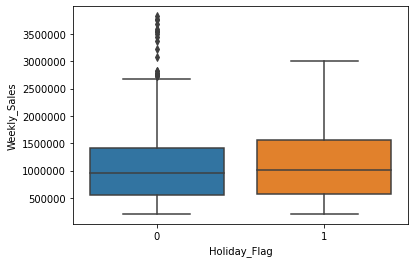

In [ ]:
#Vendas por dia de semana e feriados 
sns.boxplot(data = dados, x='Holiday_Flag', y = 'Weekly_Sales')
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
#CALCULAR AS VENDAS POR FERIADO E DIAS NORMAIS

dados.groupby("Holiday_Flag")['Weekly_Sales'].agg('sum')

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

In [ ]:
#CONTAGEM DO NÚMERO DE DIAS NORMAIS

#0 - dias normais
#1 - feriados

dados["Holiday_Flag"].value_counts(0)

0    5985
1     450
Name: Holiday_Flag, dtype: int64

Podemos observar que as métricas de vendas semanais tem uma maior expressividade em feriados, mesmo com um número de dias menor que o dias convencionais.


Vamos verificar a distribuição de vendas semanais por mês, optu-se a métrica de meses e não ano ou dias para entendermos se há um padrão dentro de um intervalo de tempo constante.

É necessário ajustar o dataframe.




In [ ]:
#CRIAR UMA COLUNA COM OS MESES
dados['month'] = pd.DatetimeIndex(dados['Date']).month
dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5


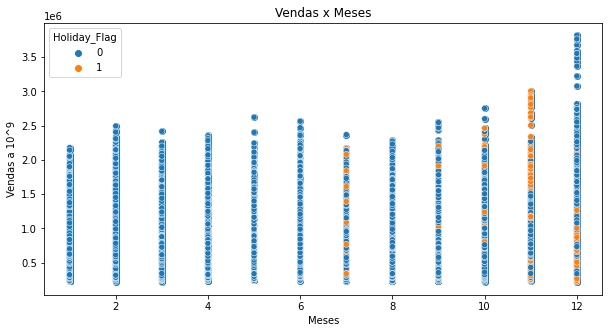

''

In [ ]:
#PLOTAR GRÁFICO DE VENDAS X MESES
plt.figure( figsize=(10,5))

x = dados['month']
y = dados['Weekly_Sales']
plt.scatter(x,y)

plt.title('Vendas x Meses')
plt.xlabel('Meses')
plt.ylabel('Vendas a 10^9')

sns.scatterplot(data=dados, x = 'month', y = 'Weekly_Sales', hue = 'Holiday_Flag')
plt.show() 
;

Observamos um comportamento de maior vendas em feriados aos meses de julho, setembro, novembro e dezembro.

Geralmente os feriados correspondestes aos seguintes meses são:

Julho - Independência americana (4 de julho)

Setembro - Dia do trabalhador (primeira segunda-feira de setembro)

Novembro - Ação de Graças (quarta quinta-feira de novembro)

Dezembro - Natal (25 de dezembro)

Para uma melhor análise vamos obvervar o comportamento do consumidor em relação a sua taxa de empregabilidade

''

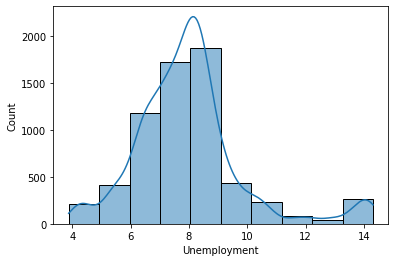

In [ ]:
#HISTOGRAMA
# seaborn
sns.histplot(x=dados['Unemployment'], kde=True, bins=10)

;

Text(0, 0.5, 'Vendas a 10^9')

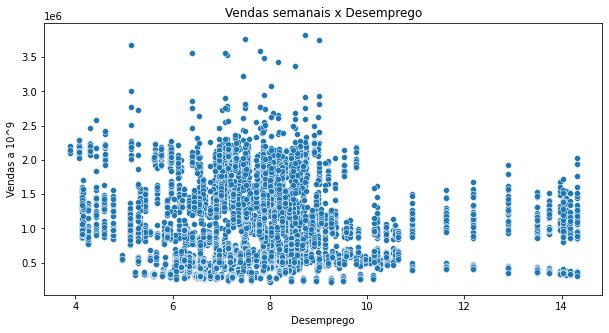

In [ ]:
#VERIFICANDO O DESEMPREGO POR FERIADO E QUANTIDADE DE VENDAS
plt.figure(figsize=(10,5))
sns.scatterplot(data=dados, x = "Unemployment", y = "Weekly_Sales")

plt.title('Vendas semanais x Desemprego')
plt.xlabel('Desemprego')
plt.ylabel('Vendas a 10^9')

Entendemos que quanto maior a taxa de desemprego menor a quantidade de compras.

É importante entender o comportamento de vendas por lojas, aqui é interessante números expressivos de vendas. 

In [ ]:
dados['year'] = pd.DatetimeIndex(dados['Date']).year
dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010


In [ ]:
#SEPARANDO LOJAS COM VENDAS SEMANAIS SUPERIORES A 3.100.000
dados.loc[(dados['Weekly_Sales']>=3100000)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163,12,2010
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441,12,2011
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127,12,2010
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,12,2011
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003,12,2010
1385,10,2011-12-23,3487986.89,0,48.36,3.541,129.984548,7.874,12,2011
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795,12,2010
1814,13,2011-12-23,3556766.03,0,24.76,3.186,129.984548,6.392,12,2011
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724,12,2010
1957,14,2011-12-23,3369068.99,0,42.27,3.389,188.929975,8.523,12,2011


In [ ]:
#VENDAS ACUMULADAS POR LOJAS
vendasacumuladas = dados.groupby(['Store'])['Weekly_Sales'].agg('sum').reset_index()
vendasacumuladas.sort_values('Weekly_Sales')

,Store,Weekly_Sales
32,33,3.716022e+07
43,44,4.329309e+07
4,5,4.547569e+07
35,36,5.341221e+07
37,38,5.515963e+07
2,3,5.758674e+07
29,30,6.271689e+07
36,37,7.420274e+07
15,16,7.425243e+07
28,29,7.714155e+07


In [ ]:
#MÉDIA DE VENDAS ACUMULADAS POR LOJAS
vendasacumuladas = dados.groupby(['Store'])['Weekly_Sales'].agg('mean').reset_index()
vendasacumuladas.sort_values('Weekly_Sales')

,Store,Weekly_Sales
32,33,2.598617e+05
43,44,3.027489e+05
4,5,3.180118e+05
35,36,3.735120e+05
37,38,3.857317e+05
2,3,4.027044e+05
29,30,4.385796e+05
36,37,5.189003e+05
15,16,5.192477e+05
28,29,5.394514e+05


In [ ]:
#DESVIO PADRÃO DE VENDAS ACUMULADAS POR LOJAS
vendasacumuladas = dados.groupby(['Store'])['Weekly_Sales'].agg('std').reset_index()
vendasacumuladas.sort_values('Weekly_Sales')

,Store,Weekly_Sales
36,37,21837.461190
29,30,22809.665590
32,33,24132.927322
43,44,24762.832015
4,5,37737.965745
42,43,40598.413260
37,38,42768.169450
2,3,46319.631557
41,42,50262.925530
35,36,60725.173579


Obervamos que as lojas 4, 14 e 20 tem um potencial de vendas atraente tanto nas vendas acumuladas e seu ponto de maiores vendas ao mês de dezembro.

Para uma análise mais segura é ideal verificar o comportamento de vendas ao longo do tempo de cada loja, para verificarmos a constância de vendas.

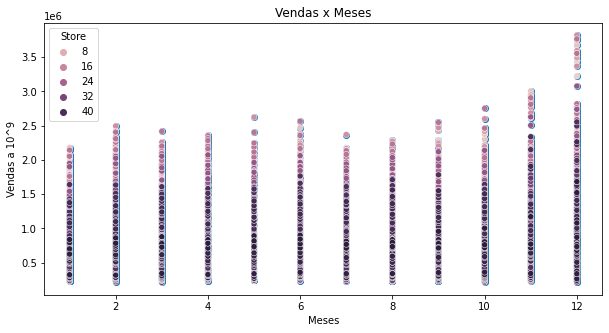

''

In [ ]:
#PLOTAR GRÁFICO DE VENDAS X MESES
plt.figure( figsize=(10,5))

x = dados['month']
y = dados['Weekly_Sales']
plt.scatter(x,y)

plt.title('Vendas x Meses')
plt.xlabel('Meses')
plt.ylabel('Vendas a 10^9')

sns.scatterplot(data=dados, x = 'month', y = 'Weekly_Sales', hue = 'Store')
plt.show() 
;

Podemos obervar as as vendas se todas as lojas, agora vamos segmentar a análise para as 3 lojas com maior número de vendas:

In [ ]:
loja20 = dados.loc[(dados['Store'] == 20)]
loja20

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
2717,20,2010-05-02,2401395.47,0,25.92,2.784,204.247194,8.187,5,2010
2718,20,2010-12-02,2109107.90,1,22.12,2.773,204.385747,8.187,12,2010
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187,2,2010
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187,2,2010
2721,20,2010-05-03,2119213.72,0,31.75,2.777,204.494073,8.187,5,2010
...,...,...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,58.65,3.997,215.736716,7.280,9,2012
2856,20,2012-05-10,2246411.89,0,60.77,3.985,215.925886,7.293,5,2012
2857,20,2012-12-10,2162951.36,0,47.20,4.000,216.115057,7.293,12,2012
2858,20,2012-10-19,1999363.49,0,56.26,3.969,216.146470,7.293,10,2012


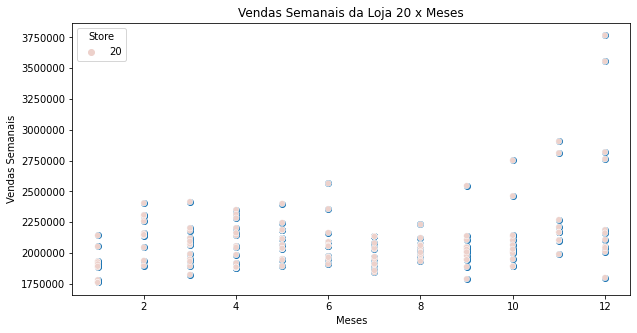

''

In [ ]:
plt.figure( figsize=(10,5))

x = loja20['month']
y = loja20['Weekly_Sales']
plt.scatter(x,y)

plt.title('Vendas Semanais da Loja 20 x Meses')
plt.xlabel('Meses')
plt.ylabel('Vendas Semanais')

plt.ticklabel_format(style='plain', axis='y')

sns.scatterplot(data=loja20, x = 'month', y = 'Weekly_Sales', hue = 'Store')
plt.show() 
;

In [ ]:
loja14 = dados.loc[(dados['Store'] == 14)]
loja14

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
1859,14,2010-05-02,2623469.95,0,27.31,2.784,181.871190,8.992,5,2010
1860,14,2010-12-02,1704218.84,1,27.73,2.773,181.982317,8.992,12,2010
1861,14,2010-02-19,2204556.70,0,31.27,2.745,182.034782,8.992,2,2010
1862,14,2010-02-26,2095591.63,0,34.89,2.754,182.077469,8.992,2,2010
1863,14,2010-05-03,2237544.75,0,37.13,2.777,182.120157,8.992,5,2010
...,...,...,...,...,...,...,...,...,...,...
1997,14,2012-09-28,1522512.20,0,64.88,3.997,192.013558,8.684,9,2012
1998,14,2012-05-10,1687592.16,0,64.89,3.985,192.170412,8.667,5,2012
1999,14,2012-12-10,1639585.61,0,54.47,4.000,192.327265,8.667,12,2012
2000,14,2012-10-19,1590274.72,0,56.47,3.969,192.330854,8.667,10,2012


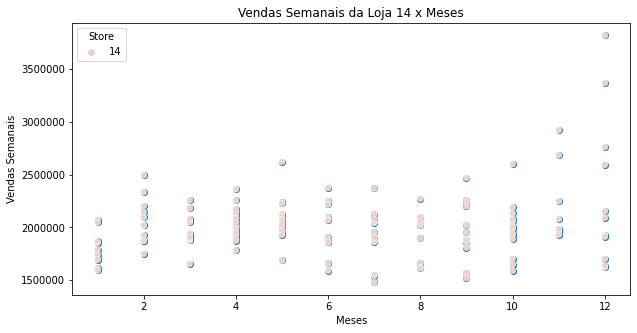

''

In [ ]:
plt.figure( figsize=(10,5))

x = loja14['month']
y = loja14['Weekly_Sales']
plt.scatter(x,y)

plt.title('Vendas Semanais da Loja 14 x Meses')
plt.xlabel('Meses')
plt.ylabel('Vendas Semanais')

plt.ticklabel_format(style='plain', axis='y')

sns.scatterplot(data=loja14, x = 'month', y = 'Weekly_Sales', hue = 'Store')
plt.show() 
;

In [ ]:
loja04 = dados.loc[(dados['Store'] == 4)]
loja04

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
429,4,2010-05-02,2135143.87,0,43.76,2.598,126.442065,8.623,5,2010
430,4,2010-12-02,2188307.39,1,28.84,2.573,126.496258,8.623,12,2010
431,4,2010-02-19,2049860.26,0,36.45,2.540,126.526286,8.623,2,2010
432,4,2010-02-26,1925728.84,0,41.36,2.590,126.552286,8.623,2,2010
433,4,2010-05-03,1971057.44,0,43.49,2.654,126.578286,8.623,5,2010
...,...,...,...,...,...,...,...,...,...,...
567,4,2012-09-28,2027620.23,0,71.74,3.666,131.043000,4.077,9,2012
568,4,2012-05-10,2209835.43,0,63.07,3.620,131.075667,3.879,5,2012
569,4,2012-12-10,2133026.07,0,57.11,3.603,131.108333,3.879,12,2012
570,4,2012-10-19,2097266.85,0,64.46,3.610,131.149968,3.879,10,2012


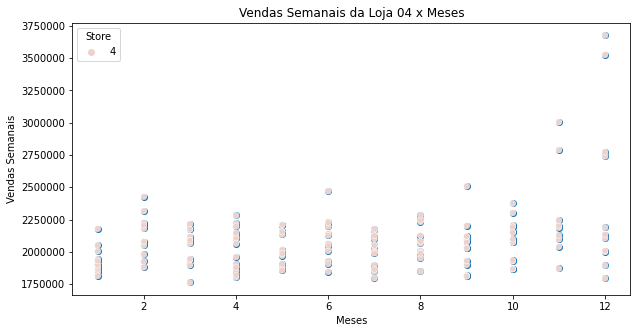

''

In [ ]:
plt.figure( figsize=(10,5))

x = loja04['month']
y = loja04['Weekly_Sales']
plt.scatter(x,y)

plt.title('Vendas Semanais da Loja 04 x Meses')
plt.xlabel('Meses')
plt.ylabel('Vendas Semanais')

sns.scatterplot(data=loja04, x = 'month', y = 'Weekly_Sales', hue = 'Store')

plt.ticklabel_format(style='plain', axis='y')

plt.show() 
;

5.3 Baseado nos dados, qual decisão devo tomar?

A loja que deve ser investida é a loja 20, pois é o estabelcimento que possui o maior número de vendas acumuladas e constância ao longo do tempo.



